# Speculation
* which keywords are high efficient amongst keywords used in advertisement campain? 
* which groups are high efficient amongst advertisement groups? 

# Used modules
Pandas, matplotlip, seaborn, wordcloud

# Conclusion

the most efficient advertisement keywards are as below:<br>
일러스트 HTML 파이썬 코딩 C언어 가상화폐 포토샵 블록체인 엑셀 컴퓨터활용능력 컴퓨터활용능력2급 컴퓨터활용능력1급 프리미어프로 폰트 스케치 글씨체 한글폰트 마블 바이럴마케팅'

the most efficient advertisement groups are as below:<br>
'#000_마케팅 전체_main', '1. 코딩', '3. html', '6. 파이썬', 'AOP 전체_중복키워드_디자인',
       'AOP 전체_중복키워드_비지니스', 'ㅍAOP 전체_중복키워드_디자인(삭제)', '마케팅 전체',
       '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵',
       '올인원 패키지 : 업무자동화_VBA', '타이포그래피와 편집디자인', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)'
       


In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


%matplotlib inline

# korean font settings
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
sns.set_style('whitegrid')

# display settings

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# data settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_excel('data/report.xls', skiprows=[0], encoding="cp949")

In [3]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


# Data preprocessing for advertisement keywords

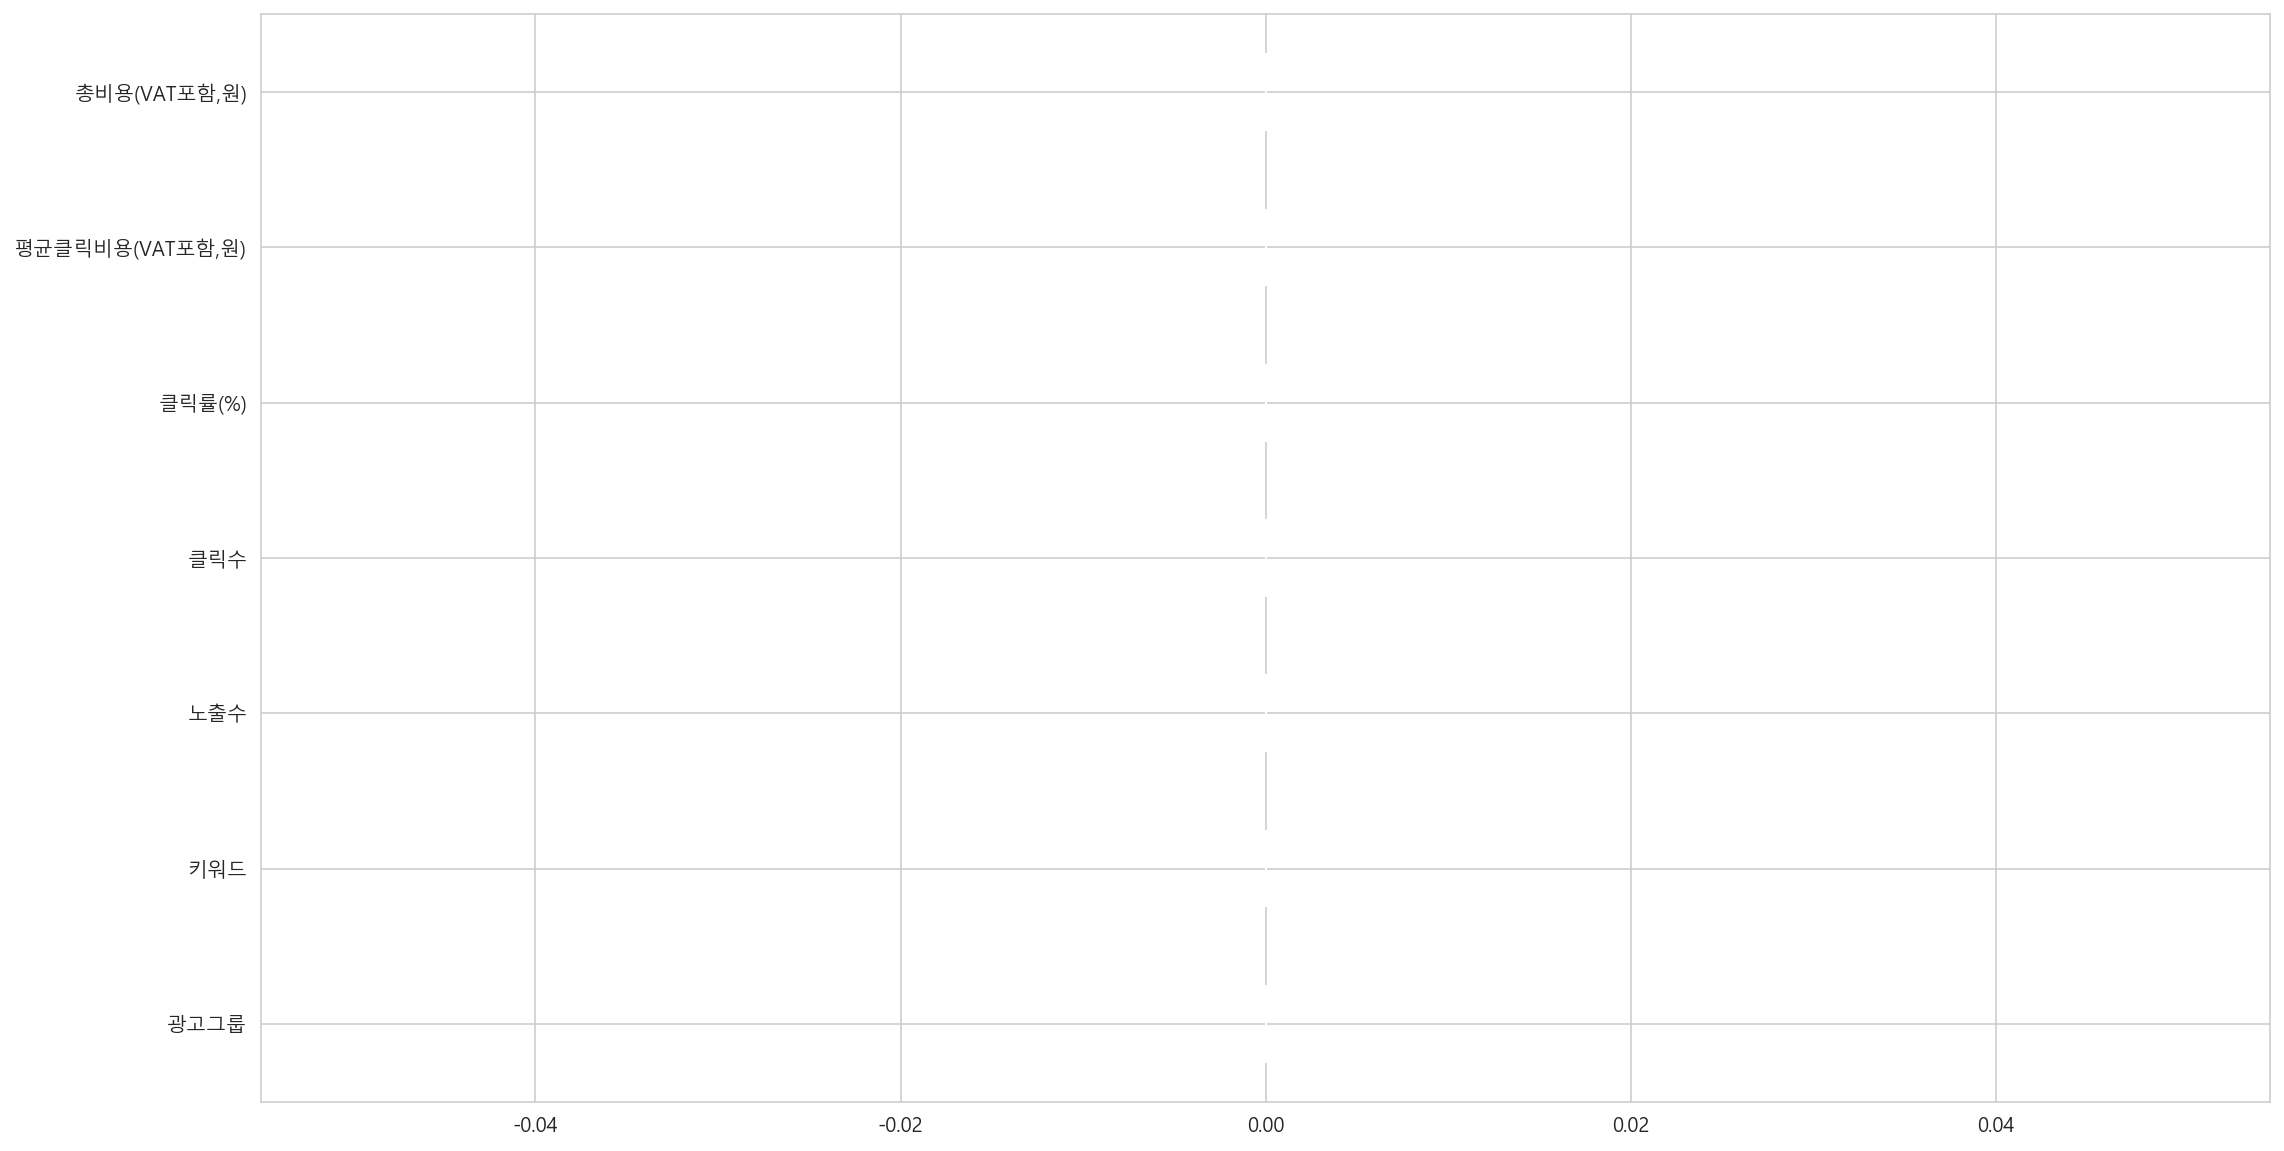

In [4]:
# check missing data
plt.rc('font', family='Malgun Gothic')
df.isnull().sum().plot.barh(figsize=(18,10))

In [5]:
# No.of Click, Rate of Click, Cost of Avg. Click
df['클릭수(filtered)'] = round(df['클릭수'],0).astype(int)
df['클릭률(filtered)'] = df['클릭수(filtered)'] / df['노출수'] * 100
df['총비용(VAT포함,원, filtered)'] = round(df['총비용(VAT포함,원)'],0).astype(int)

In [6]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)",클릭수(filtered),클릭률(filtered),"총비용(VAT포함,원, filtered)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444,9606,0.414149,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965,8058,1.049915,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699,324,0.028475,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174,1864,0.268547,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903,814,0.008456,1145903


# Visualisation of efficient advertisement keywoards

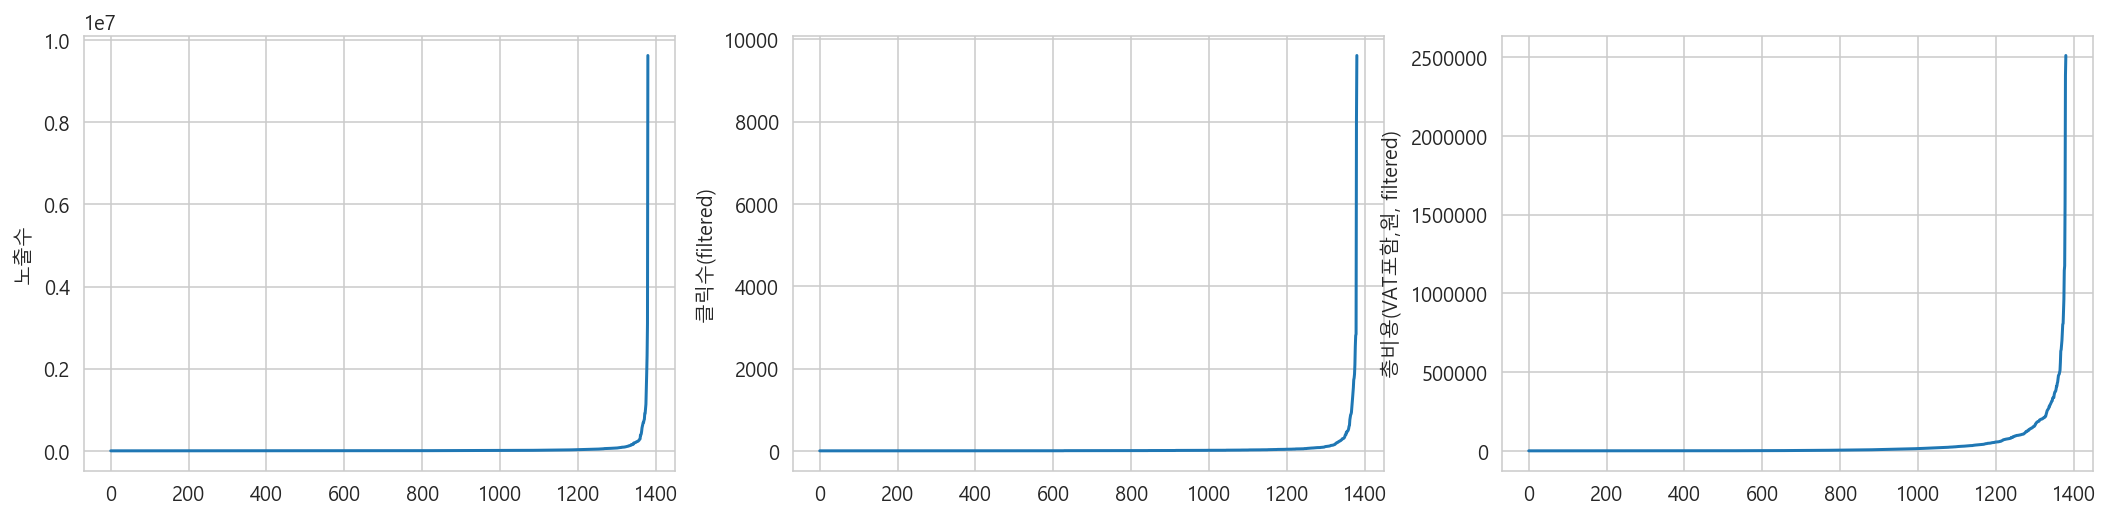

In [7]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18, 4)


df_ep = df['노출수'].sort_values(ascending=True).reset_index().drop('index', axis=1)
sns.lineplot(data=df_ep, x=df_ep.index, y="노출수", ax=ax1)

df_cn = df['클릭수(filtered)'].sort_values(ascending=True).reset_index().drop('index', axis=1)
sns.lineplot(data=df_cn, x=df_cn.index, y="클릭수(filtered)", ax=ax2)

df_tc = df['총비용(VAT포함,원, filtered)'].sort_values(ascending=True).reset_index().drop('index', axis=1)
sns.lineplot(data=df_tc, x=df_tc.index, y="총비용(VAT포함,원, filtered)", ax=ax3)

## Efficient advertisement keywords matching to 95% or above impressions

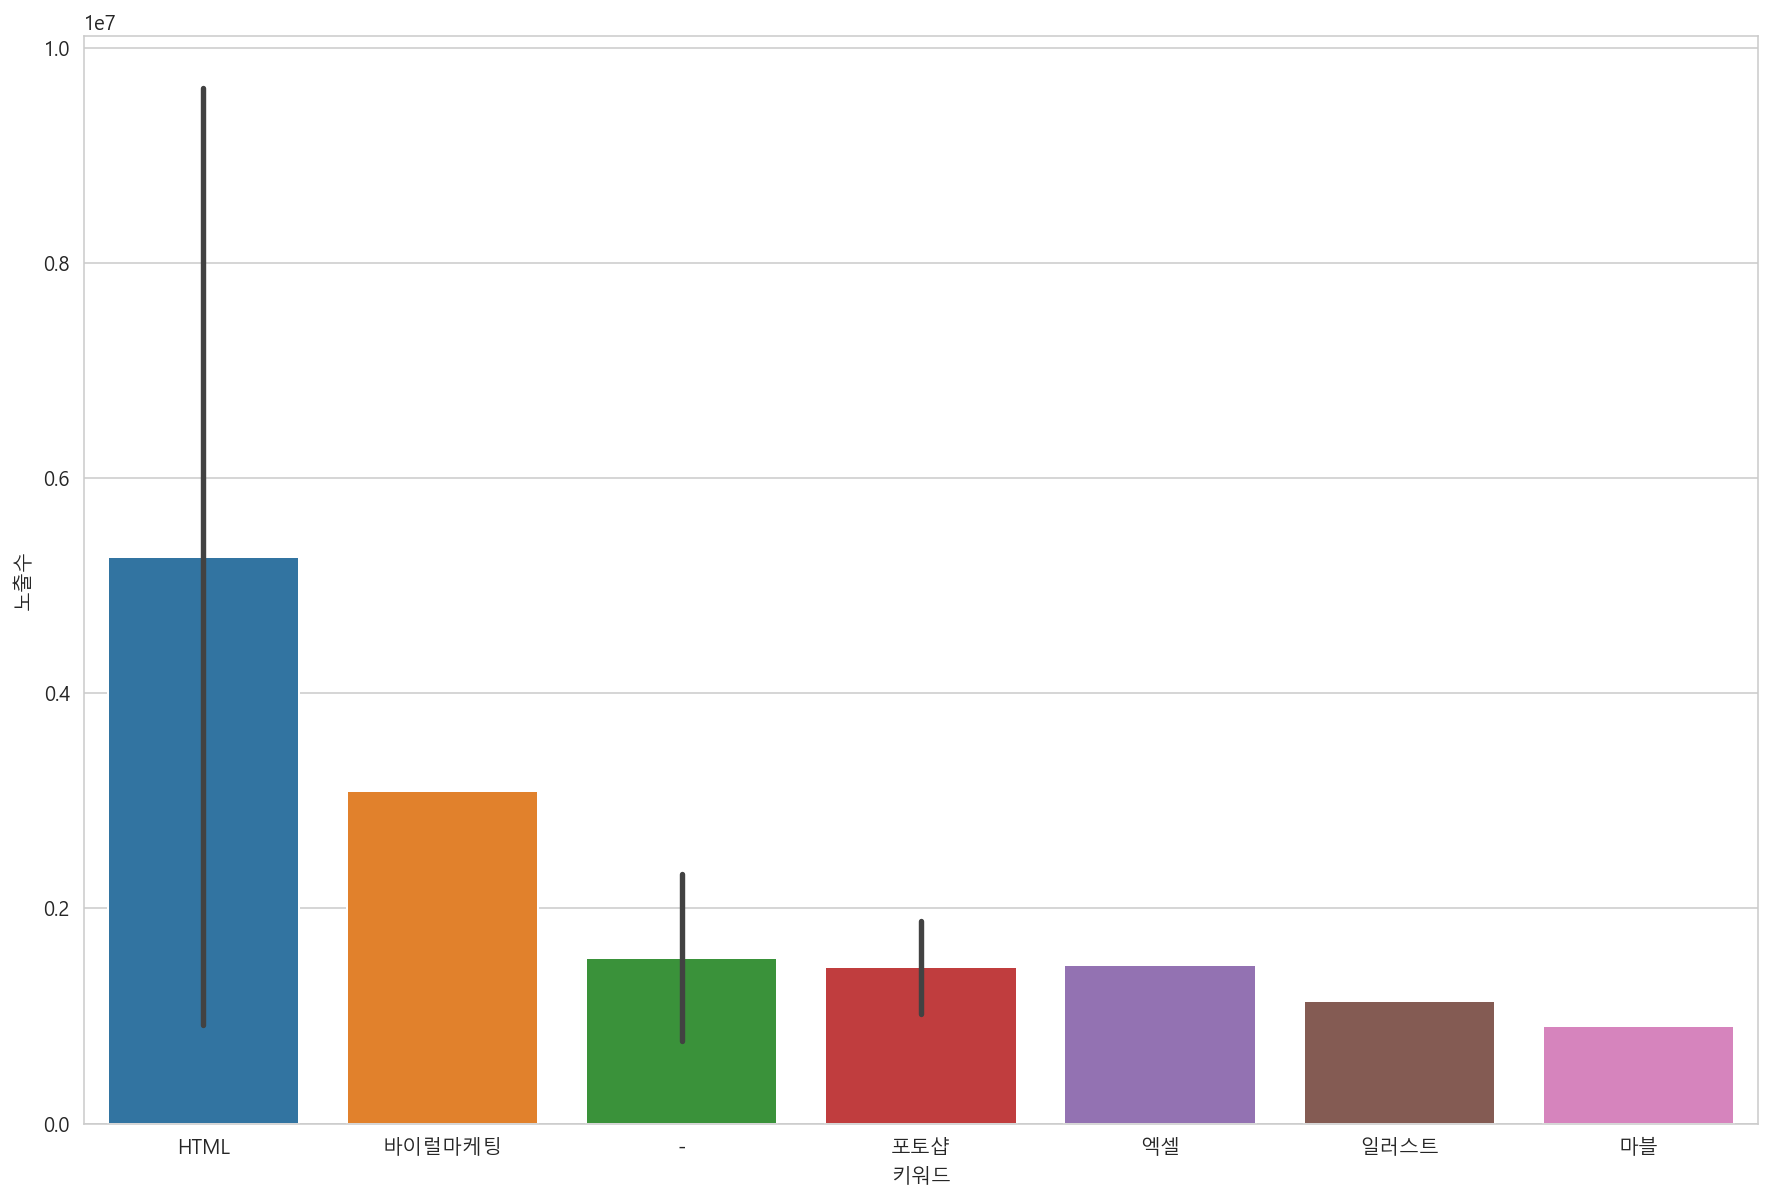

In [8]:
plt.rc('font', family='Malgun Gothic')
df_imp_kw = df.loc[df["노출수"] >= df["노출수"].quantile(0.95),["키워드","노출수"]]

df_imp_kw_sort = df_imp_kw.sort_values(by="노출수", ascending=False ).head(10)
plt.figure(figsize=(15,10))
sns.barplot(data=df_imp_kw_sort, x="키워드", y="노출수")

## Efficient advertisement keywords matching to 95% or above clicks

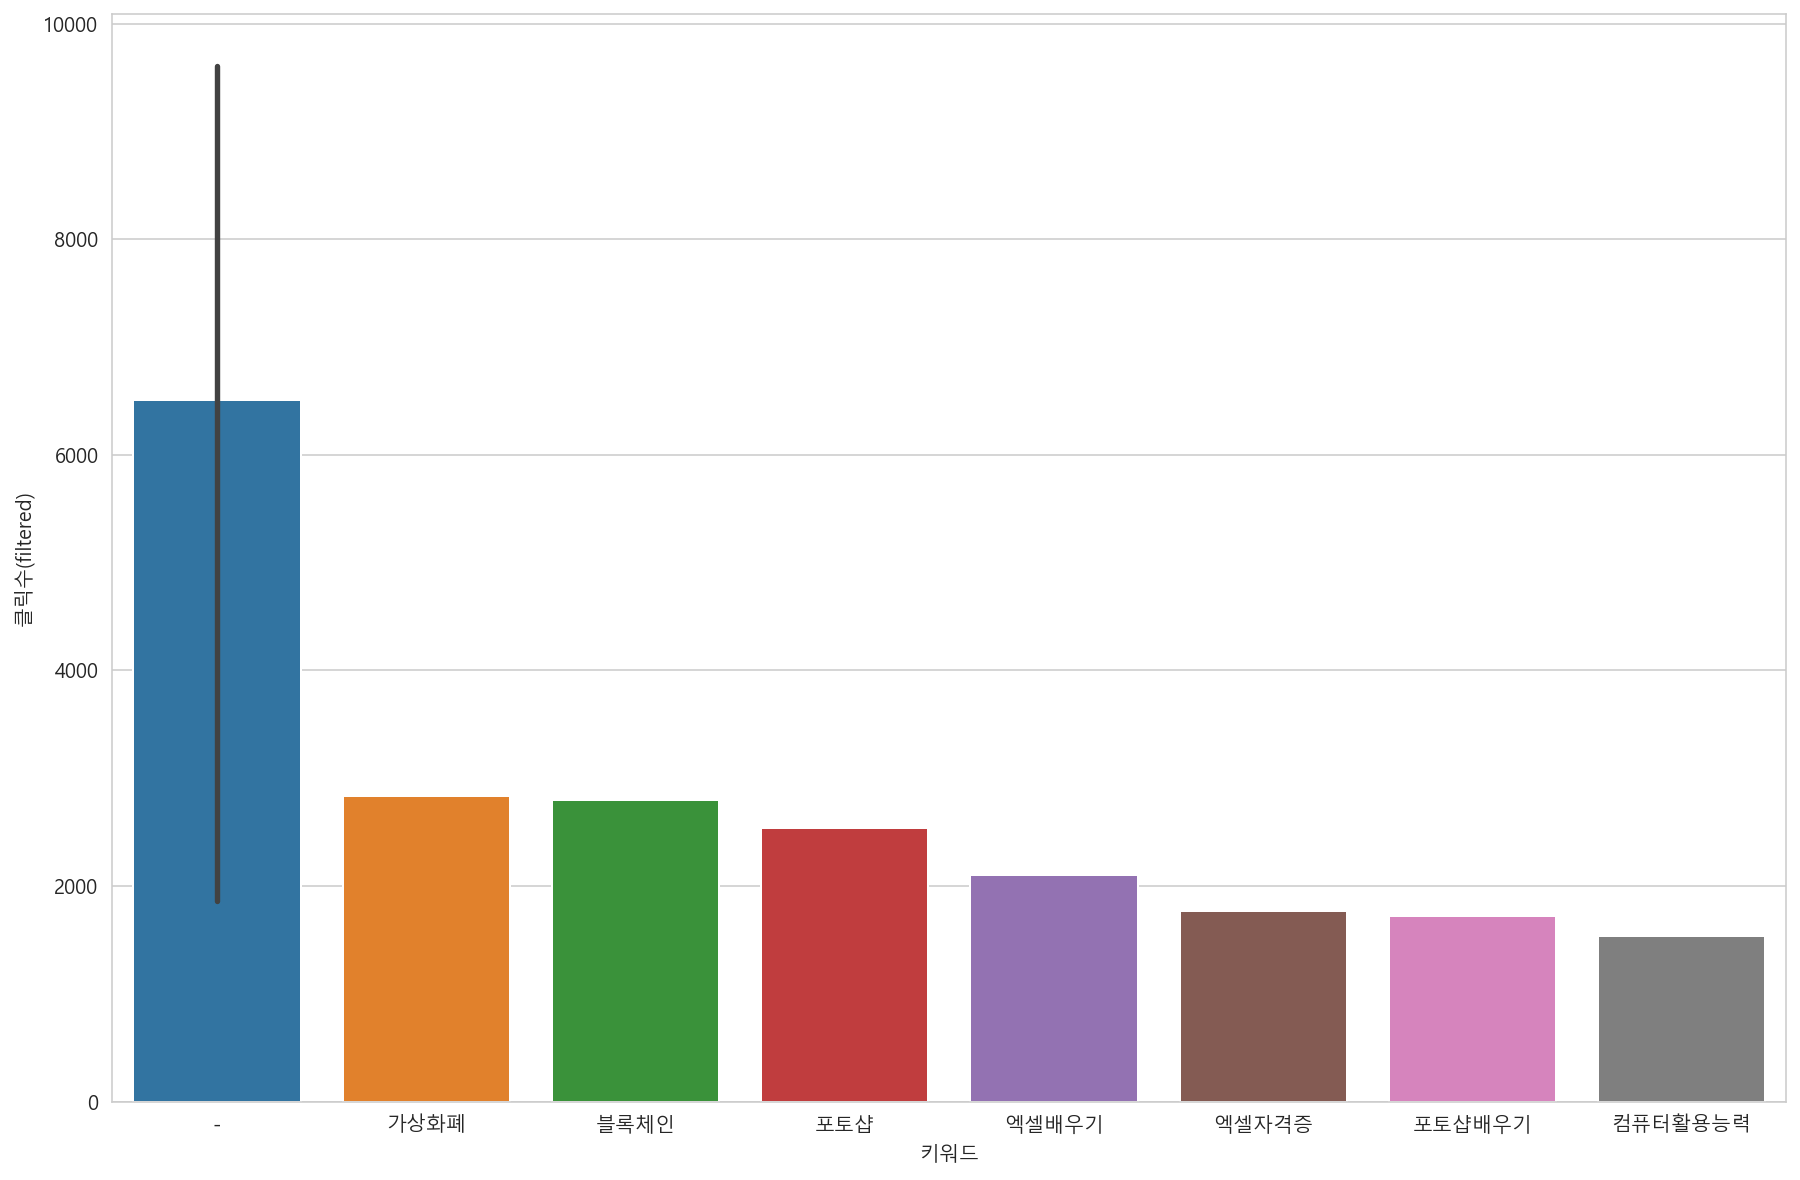

In [9]:
df_cp_kw = df.loc[df["클릭수(filtered)"] >= df["클릭수(filtered)"].quantile(0.95),["키워드","클릭수(filtered)"]]
df_cp_kw_sort = df_cp_kw.sort_values(by="클릭수(filtered)", ascending=False ).head(10)
plt.figure(figsize=(15,10))
sns.barplot(data=df_cp_kw_sort, x="키워드", y="클릭수(filtered)")

## Efficient advertisement keywords matching to 95% or above impressions & clicks

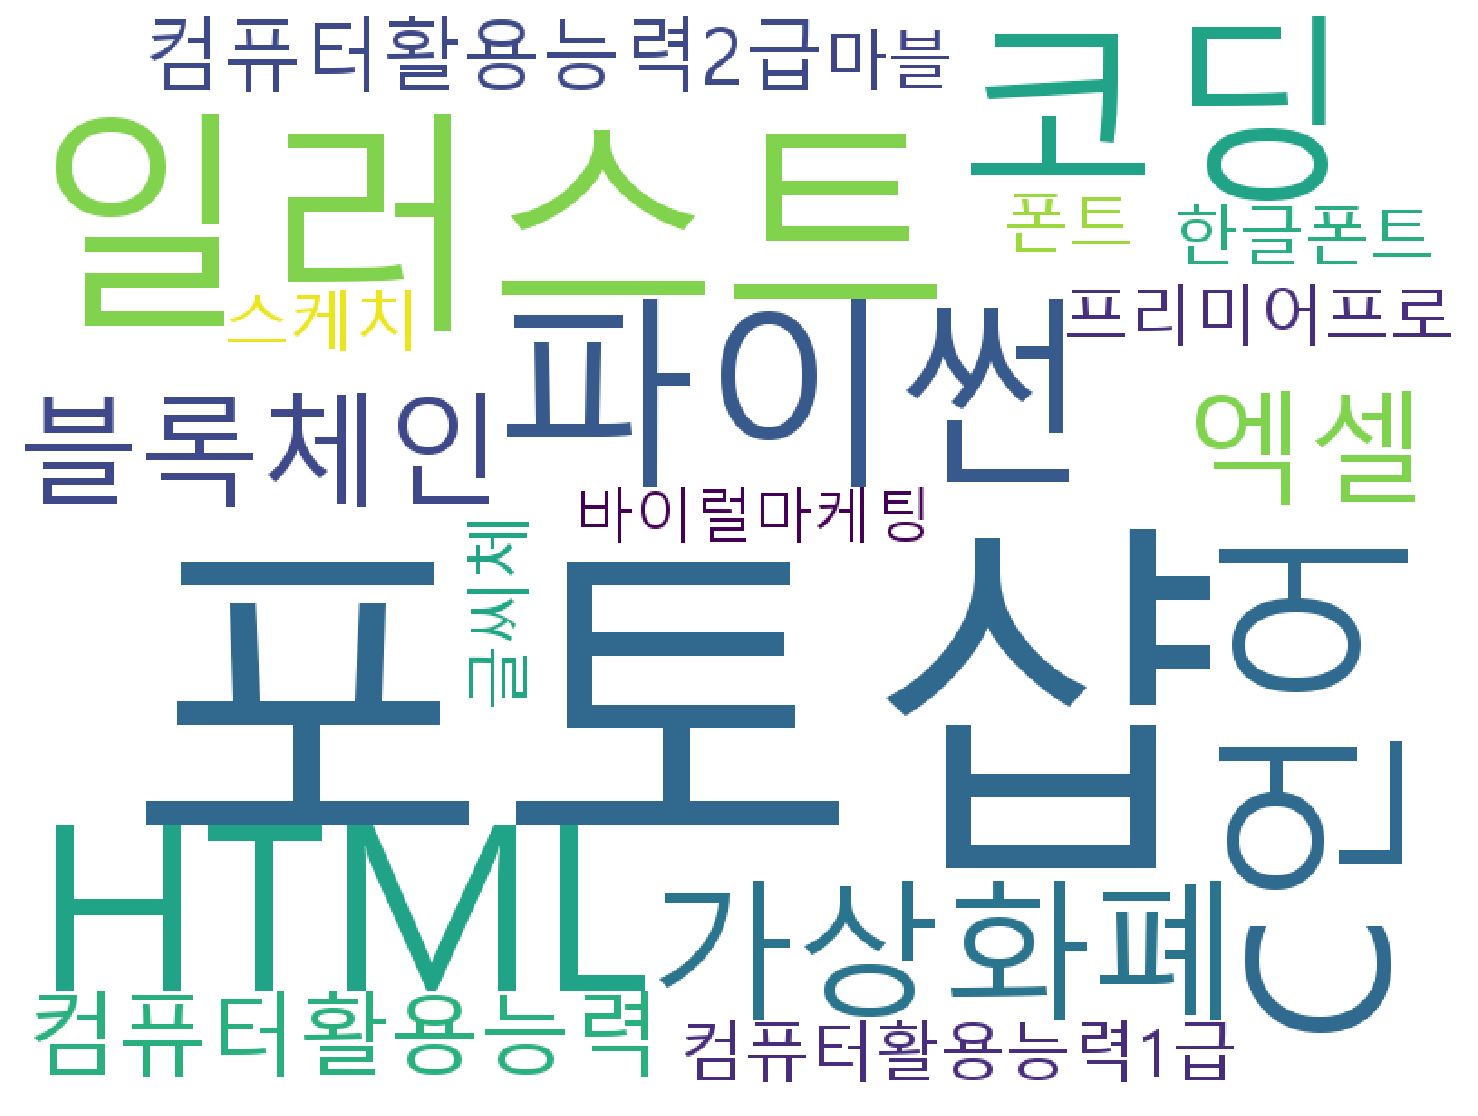

In [10]:
df_imcp_kw = df.loc[(df["노출수"] >= df["노출수"].quantile(0.95)) & 
                    (df["클릭수(filtered)"] >= df["클릭수(filtered)"].quantile(0.95)),
                    ["키워드", "노출수","클릭수(filtered)"]]
df_imcp_kw["키워드"]


wc = WordCloud(stopwords = STOPWORDS,font_path='font/malgun.ttf',
              background_color="white", width=800, height=600).generate(' '.join(df_imcp_kw["키워드"]))

plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

## Low efficient advertisement keywords
* impressions below 95%
* clicks less than 95%
* total costs between 85% and 95%

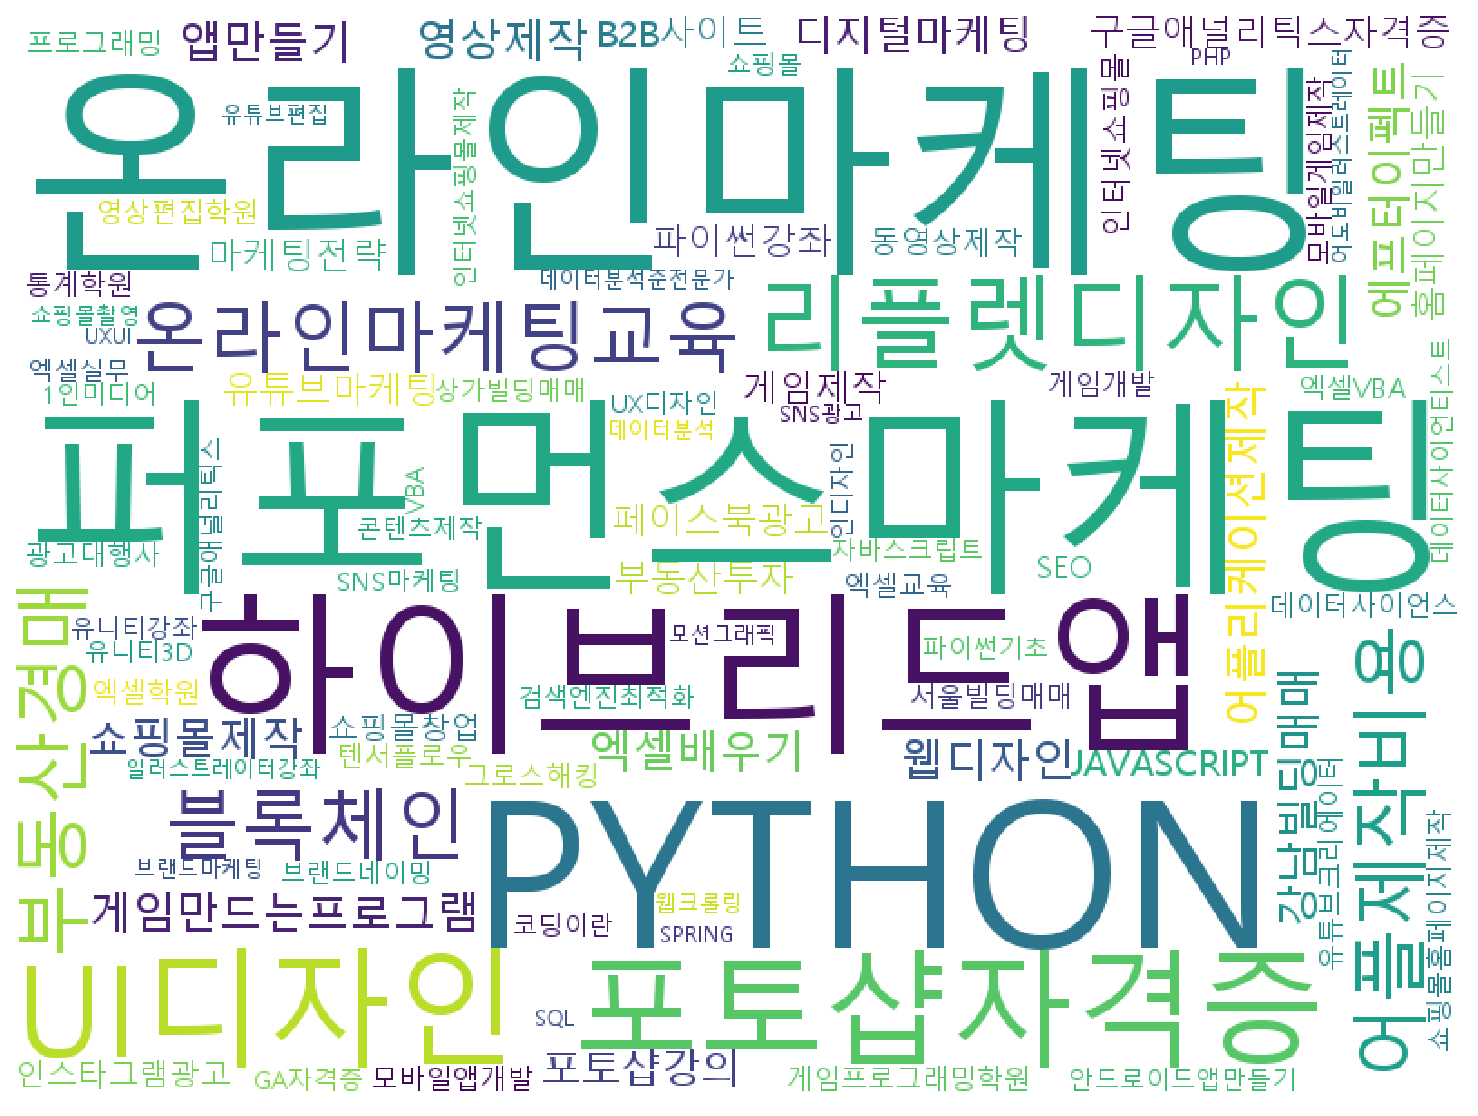

In [11]:
df_no_imcp_kw = df.loc[
                    (df["노출수"] < df["노출수"].quantile(0.95)) & 
                    (df["클릭수(filtered)"] < df["클릭수(filtered)"].quantile(0.95)) & 
                    (df["총비용(VAT포함,원, filtered)"] >= df["총비용(VAT포함,원, filtered)"].quantile(0.85)) & 
                    (df["총비용(VAT포함,원, filtered)"] < df["총비용(VAT포함,원, filtered)"].quantile(0.95)),
                    ["키워드", "노출수","클릭수(filtered)"]
                    ]
df_no_imcp_kw["키워드"]



wc = WordCloud(stopwords = STOPWORDS,font_path='data/malgun.ttf',
              background_color="white", width=800, height=600).generate(' '.join(df_no_imcp_kw["키워드"]))

plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

# Data preprocessing for advertisement groups

In [12]:
dfg = df.groupby("광고그룹").sum()

In [13]:
dfg.head()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)",클릭수(filtered),클릭률(filtered),"총비용(VAT포함,원, filtered)"
광고그룹,,,,,,,,
#000_마케팅 전체_main,709447,403.2,8.827081,30004.142165,347710,401,8.828310,347710
001.BASIC DESIGN,51647,61.2,2.096316,2688.244398,21846,60,2.038075,21846
001.데이터분석/ 통계,37150,202.8,8.905710,10214.733573,195756,202,8.891065,195756
002.R,120724,76.8,1.000794,3240.346154,43164,78,1.034098,43164
002.UX/UI,15454,20.4,0.446702,349.642857,2750,20,0.418420,2750


In [14]:
dfg["클릭률(%,filtered)"] = dfg["클릭수(filtered)"] / dfg["노출수"]
dfg["평균클릭비용(VAT포함,원,filtered)"] = dfg["총비용(VAT포함,원, filtered)"] / dfg["클릭수(filtered)"]

In [15]:
dfg[dfg["클릭수(filtered)"] == 0]

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)",클릭수(filtered),클릭률(filtered),"총비용(VAT포함,원, filtered)","클릭률(%,filtered)","평균클릭비용(VAT포함,원,filtered)"
광고그룹,,,,,,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0.0,0.0,0.0,0,0,0.0,0,0.0,NaN
fin_camp_business_4,2136,0.0,0.0,0.0,0,0,0.0,0,0.0,NaN
fin_camp_rfs_9,1928,0.0,0.0,0.0,0,0,0.0,0,0.0,NaN
다함께 DDD 프로젝트,3689,0.0,0.0,0.0,0,0,0.0,0,0.0,NaN
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0.0,0.0,0.0,0,0,0.0,0,0.0,NaN


In [16]:
dfg["평균클릭비용(VAT포함,원,filtered)"] = dfg["평균클릭비용(VAT포함,원,filtered)"].fillna(0)
dfg["평균클릭비용(VAT포함,원,filtered)"] = round(dfg["평균클릭비용(VAT포함,원,filtered)"],0).astype(int)

In [17]:
dfg.head()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)",클릭수(filtered),클릭률(filtered),"총비용(VAT포함,원, filtered)","클릭률(%,filtered)","평균클릭비용(VAT포함,원,filtered)"
광고그룹,,,,,,,,,,
#000_마케팅 전체_main,709447,403.2,8.827081,30004.142165,347710,401,8.828310,347710,0.000565,867
001.BASIC DESIGN,51647,61.2,2.096316,2688.244398,21846,60,2.038075,21846,0.001162,364
001.데이터분석/ 통계,37150,202.8,8.905710,10214.733573,195756,202,8.891065,195756,0.005437,969
002.R,120724,76.8,1.000794,3240.346154,43164,78,1.034098,43164,0.000646,553
002.UX/UI,15454,20.4,0.446702,349.642857,2750,20,0.418420,2750,0.001294,138


# Visualisation of efficient advertisement groups 

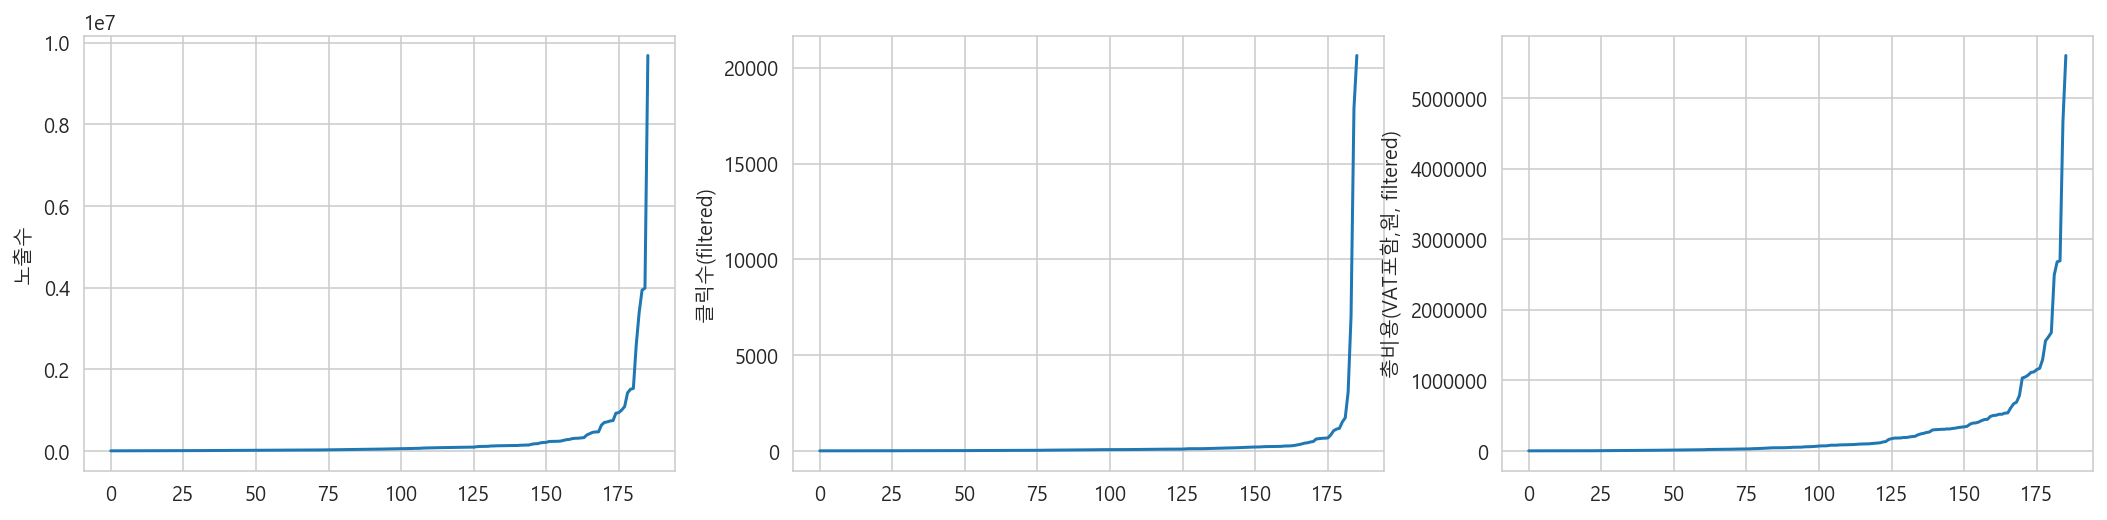

In [18]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18, 4)


df_ep = dfg["노출수"].sort_values().reset_index().drop("광고그룹", axis=1)
sns.lineplot(data=df_ep, x=df_ep.index, y="노출수", ax=ax1)

df_cn = dfg["클릭수(filtered)"].sort_values().reset_index().drop("광고그룹", axis=1)
sns.lineplot(data=df_cn, x=df_cn.index, y="클릭수(filtered)", ax=ax2)

df_tc = dfg["총비용(VAT포함,원, filtered)"].sort_values().reset_index().drop("광고그룹", axis=1)
sns.lineplot(data=df_tc, x=df_tc.index, y="총비용(VAT포함,원, filtered)", ax=ax3)

## High efficient ad groups
* 80% or above impressions
* 90% or above clicks

In [19]:
result = dfg[(dfg["노출수"] >= dfg["노출수"].quantile(0.8)) & (dfg["클릭수(filtered)"] >= dfg["클릭수(filtered)"].quantile(0.9))]
result.index

Index(['#000_마케팅 전체_main', '1. 코딩', '3. html', '6. 파이썬', 'AOP 전체_중복키워드_디자인',
       'AOP 전체_중복키워드_비지니스', 'ㅍAOP 전체_중복키워드_디자인(삭제)', '마케팅 전체',
       '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵',
       '올인원 패키지 : 업무자동화_VBA', '타이포그래피와 편집디자인', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)'],
      dtype='object', name='광고그룹')

## Low efficient ad groups
* impressions below 80%
* clicks less than 90%
* total costs between 60% and 90%

In [20]:
cost = dfg[
        (dfg["노출수"] < dfg["노출수"].quantile(0.8)) &
        (dfg["클릭수(filtered)"] < dfg["클릭수(filtered)"].quantile(0.9)) &
        (dfg["총비용(VAT포함,원, filtered)"] >= dfg["총비용(VAT포함,원, filtered)"].quantile(0.6)) &
        (dfg["총비용(VAT포함,원, filtered)"] < dfg["총비용(VAT포함,원, filtered)"].quantile(0.9))   
          ]
cost.index

Index(['001.데이터분석/ 통계', '002.마케팅 입문', '003.퍼포먼스 마케팅', '1. 전체', '2. 프로그래밍',
       '5. 자료구조', 'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_데이터사이언스',
       'AOP 전체_중복키워드_프로그래밍', 'JavaScript BOOT CAMP',
       'Python & Django를 활용한 웹 서비스_개발자', 'SEO/SEM 전략',
       'TensorFlow로 시작하는 딥러닝 입문', 'fin_camp_auction_6', 'ㅍAOP 전체_중복키워드_공통(삭제)',
       'ㅍAOP 전체_중복키워드_마케팅(삭제)', 'ㅍAOP 전체_중복키워드_프로그래밍(삭제)',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', 'ㅍ올인원 패키지 : 브랜딩',
       '고객의 마음을 읽는 구글애널리틱스', '대기업을 이기는 브랜딩 전략', '마케터를 위한 데이터 부트캠프',
       '마케터를 위한 데이터 해석 실전', '마케팅 유치원', '마케팅KPI수립',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_02.쇼핑몰구축', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO',
       '올인원 패키지 : UX/UI 디자인 입문_연관검색어', '올인원 패키지 : 그로스해킹_5.마케팅 분석',
       '올인원 패키지 : 디지털 마케팅_1. 디지털 마케팅', '올인원 패키지 : 브랜딩',
       '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 업무자동화_4. VBA',
       '올인원 패키지 : 영상 제작/편집_9.유튜브/유튜버', '왕초보의 파이썬 웹 프로그래밍 CAMP',
       '코딩으로 여행하는 블록체인 서비스', '페이스북&인스타그램 마케팅 실전', '프로그래밍 유치원'],
      dtype='object', name='광고그룹')